# Explore data variance

<img src="https://i.guim.co.uk/img/media/6e63e829df2d58d73253ad09e0f4963087feb236/0_123_4500_2700/master/4500.jpg?width=3250&quality=85&auto=format&fit=max&s=3e168537ca9c10ff418f5265aba86f56">

## Setup

In [1]:
sample_file <- "sample_combined_2019-09-16.feather"

In [2]:
library(DataAnalysisTools)
library(tidyverse)
library(oildata)
library(gridExtra)

── Attaching packages ─────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [3]:
set.seed(6)

In [4]:
options(repr.plot.width=7, repr.plot.height=5.5)

## Load data

In [5]:
sample <- feather::read_feather(sample_file)
sample_n(sample, 5)

YEAR,OPERATOR_ID,CRUDE_AGE_UNKNOWN_MILES,CRUDE_AVG_AGE,CRUDE_INCIDENTS,CRUDE_MILES,CRUDE_MILES_1940,CRUDE_MILES_1950,CRUDE_MILES_1960,CRUDE_MILES_1970,⋯,HVL_MILES_2000_3,HVL_MILES_2010_3,NON_HVL_MILES_1940_3,NON_HVL_MILES_1950_3,NON_HVL_MILES_1960_3,NON_HVL_MILES_1970_3,NON_HVL_MILES_1980_3,NON_HVL_MILES_1990_3,NON_HVL_MILES_2000_3,NON_HVL_MILES_2010_3
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015,26049,0,31.3655,1,2.2,45.8,8.8,0,27.2,⋯,0.00,0.00,0,151.30,0.20,0.00,52.70,0.20,1.40,0.60
2011,ONEOK (Group),0,0.0000,0,0.0,0.0,0.0,0,0.0,⋯,4705.96,183.28,0,443.19,326.37,116.70,71.94,29.19,0.26,0.45
2005,4805,0,0.0000,0,0.0,0.0,0.0,0,0.0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2006,25146,0,0.0000,0,0.0,0.0,0.0,0,0.0,⋯,9.10,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2011,Chevron (Group),0,0.0000,0,0.0,0.0,0.0,0,0.0,⋯,154.69,0.00,170,1753.45,673.12,97.09,57.32,0.00,38.35,0.00


In [6]:
pipelines <- oildata::pipelines
sample_n(pipelines, 5)

year,ID,name,commodity,hca_offshore,hca_onshore,hca_total,total_onshore,total_offshore,total_miles,significant_incidents,serious_incidents
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2009,Tesoro (Group),"Tesoro Refining & Marketing Co., Mountain Region",non_hvl,0.00,11.70,11.70,11.70,0.00,11.70,0,0
2006,18667,Plains Exploration & Production Company,crude,10.15,19.82,29.97,19.82,10.15,29.97,0,0
2010,26045,Tesoro Hawaii Corporation,non_hvl,0.80,23.40,24.20,23.10,0.80,23.90,0,0
2005,31174,Shell Pipeline Company,crude,19.90,1328.00,1347.90,2226.70,1540.50,3767.20,10,0
2011,31874,"Tesoro Refining & Marketing C O., Golden Eagle",non_hvl,NA,10.05,10.05,1.20,0.00,1.20,0,0


## Add missing names

In [7]:
sample$Name <- oildata::add_company_names(sample$OPERATOR_ID)
head(sample)

YEAR,OPERATOR_ID,CRUDE_AGE_UNKNOWN_MILES,CRUDE_AVG_AGE,CRUDE_INCIDENTS,CRUDE_MILES,CRUDE_MILES_1940,CRUDE_MILES_1950,CRUDE_MILES_1960,CRUDE_MILES_1970,⋯,HVL_MILES_2010_3,NON_HVL_MILES_1940_3,NON_HVL_MILES_1950_3,NON_HVL_MILES_1960_3,NON_HVL_MILES_1970_3,NON_HVL_MILES_1980_3,NON_HVL_MILES_1990_3,NON_HVL_MILES_2000_3,NON_HVL_MILES_2010_3,Name
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2015,1248,0,38.58750,1,64.000,0,0.000,359.000,149.00,⋯,0.00,0.00,0.000,147.000,0.000,0.000,80.00,0.000,0.000,Belle Fourche Pipeline
2015,14194,0,0.00000,0,0.000,0,0.000,0.000,0.00,⋯,0.00,0.00,0.000,0.000,0.000,0.000,16.74,28.940,0.000,"Oiltanking, Houston"
2015,15156,0,38.54918,0,211.000,79,10.000,168.000,113.00,⋯,0.00,49.00,12.000,600.000,179.000,3.000,138.00,188.000,114.000,Sinclair Transportation Company
2015,19319,0,0.00000,0,0.000,0,0.000,0.000,0.00,⋯,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.000,0.000,Tpc Group
2015,22430,0,59.68541,0,3.582,0,3.554,0.023,0.00,⋯,0.00,0.00,63.152,755.763,150.046,9.894,9.74,0.672,0.983,West Shore Pipeline
2015,22855,0,29.24262,1,798.900,0,213.880,0.000,264.61,⋯,36.53,5.59,0.630,29.790,4.260,2478.960,1096.80,13.740,2.530,Flint Hills Resources


## Dataset overview

### 1 - Pipelines raw datasets

* Different reporting rules (and datasets) for different periods of time.
* Companies file separate reports for separate commodities being transported.
* For historical reasons, some companies file separate reports for separate parts of the company, sometimes under the same ID, sometimes under separate IDs.
* Many things are inconsistent between datasets (e.g., commodities, variable names).

In [8]:
sample_n(pipelines_2010, 5)

DATAFILE_AS_OF,year,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,ID,name,PARTA4STREET,PARTA4CITY,PARTA4STATE,PARTA4ZIP,⋯,PARTE2010HF,PARTE2010LF,PARTE2010TOTAL,PARTETOTAL,PARTETOTALHF,PARTETOTALLF,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dttm>,<dttm>,<chr>
2019-12-02 04:39:03,2010,20110318,12373,18092,Sfpp,500 DALLAS STREET,HOUSTON,TX,77002,⋯,0.59,0,0.59,2584.360,1626.360,958.0,SUPPLEMENTAL,2011-08-15 13:31:39,2013-07-09 13:51:22,7000-1.1 (Rev. 06-2011)
2019-12-02 05:02:31,2014,20151272,13387,20202,Ultramar,2402 EAST ANAHEIM STREET,WILMINGTON,CA,90744,⋯,0.00,0,0.00,3.640,3.640,0.0,INITIAL,2015-06-03 11:59:48,2015-06-03 11:59:48,7000-1.1 (Rev. 06-2014)
2019-12-02 05:24:44,2017,20183076,15561,32258,Kinder Morgan Cochin,"1001 LOUISIANA ST., SUITE 1000",HOUSTON,TX,77002,⋯,1.43,0,1.43,237.260,237.260,0.0,INITIAL,2018-04-18 12:02:00,2018-04-18 12:02:00,7000-1.1 (Rev. 06-2014)
2019-12-02 04:43:41,2011,20130306,13134,39014,Galveston Bay Energy,"800 GESSNER RD, SUITE 200",HOUSTON,TX,77024,⋯,0.00,0,0.00,13.200,0.000,13.2,SUPPLEMENTAL,2013-06-13 11:57:45,2014-06-23 11:33:37,7000-1.1 (Rev. 06-2011)
2019-12-02 05:30:08,2018,20190416,16847,18678,St Louis Pipeline Operating,4120 HIGEL STREET,SARASOTA,FL,34242,⋯,0.38,0,0.38,21.819,21.819,0.0,INITIAL,2019-06-13 08:53:42,2019-06-13 08:53:42,7000-1.1 (Rev. 06-2014)


In [9]:
sample_n(pipelines_2004, 5)

ORIGINAL,SUPPLEMENT,year,RPTID,HL_SUP_ID,commodity,ID,name,PARENT,OFSTREET,⋯,BA_7,BA_8,DOR,DOE,PNAME,PPHONE,PEMAIL,PFAX,total_onshore,total_offshore
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Y,N,2005,20050367,1340,hvl,10012,Kaneb Pipe Line Company,NA,ONE VALERO WAY,⋯,0.000,NA,2006-06-19 20:00:00,2006-06-29 13:54:07,JIM STOKES,2103454693,JIM.STOKES@VALERO.COM,2103704693.0,1995.000,0
Y,N,2006,20060123,2352,crude,32195,Signal Hill Petroleum,NA,2901 ORANGE AVENUE,⋯,1.229,NA,2007-05-28 20:00:00,2007-06-05 07:05:24,"JAMES S. LEE, REGULATORY SPECIALIST",5625956440.0,JSLEE@SHPI.NET,5624264587.0,1.229,0
Y,N,2005,20050042,856,non_hvl,22430,West Shore Pipeline Company,NA,"6100 S. YALE, PO BOX 3758",⋯,0.000,NA,2006-03-14 19:00:00,2006-03-15 11:10:48,CARTER FAIRLESS,9184955342,CFAIRLE@CITGO.COM,9184954601.0,597.000,0
Y,N,2009,20090189,7067,CO2 OR OTHER,31875,Merit Energy Company,NA,400 NORTH INDUSTRIAL BLVD.,⋯,0.000,0,2010-06-01 20:00:00,2010-06-02 08:40:30,BILL ELLSWORTH,3073282345,RICKY.WELCHER@MERITENERGY.COM,NA,118.000,0
Y,N,2008,20080025,4286,crude,22430,West Shore Pipeline,NA,"6100 S. YALE, PO BOX 3758",⋯,0.000,NA,2009-02-11 19:00:00,2009-02-12 09:50:17,CARTER FAIRLESS,9184955342,CFAIRLE@CITGO.COM,9185242011,3.582,0


### 2 - Company groups and M&As

* I looked up all M&As and ownership on LexisNexis.
* Requires manual definition of aggregation rules.
* Aggregation takes place twice just for data on pipeline network: within companies, and for company groupings.
* In addition, might need to aggregate between commodities.

In [10]:
sample_n(m_as, 5)

group_name,members,start_year,end_year,type
<fct>,<fct>,<dbl>,<dbl>,<fct>
Kinder Morgan (Group),32258,NA,NA,group
Energy Transfer Partners (Group),LDH Energy (Group),2011,NA,m_a
Enbridge (Group),32080,NA,NA,group
Torrance (Group),39534,NA,NA,group
Tesoro (Group),39029,NA,NA,group


### 3 - Pipeline incidents

* Pipeline incidents are reported in a separate dataset.
* Each incident is a separate observation in that dataset.
* Obviously, aggregation is required again to obtain the number of incident per organization/commodity/year.

In [11]:
sample_n(select(incidents_2010, -narrative), 5)

DATAFILE_AS_OF,significant,serious,ipe,integrity_assessment_target,operations_maintenance_target,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_RECEIVED_DATE,REPORT_TYPE,⋯,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,PREPARER_TELEPHONE,PREPARER_FAX,PREPARED_DATE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL
<dttm>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>
2019-11-29 04:37:22,FALSE,FALSE,NO,NO,NO,20130195,18163,2013-06-05 14:12:32,ORIGINAL FINAL,⋯,AL KRAVATZ,DOT COMPLIANCE SPECIALIST,ackravatz@sunocologistics.com,610-859-5755,866-741-1888,2013-06-04 20:00:00,AL KRAVATZ,DOT COMPLIANCE SPECIALIST,610-859-5755,ackravatz@sunocologistics.com
2019-11-29 04:37:22,FALSE,FALSE,NO,NO,NO,20110453,18547,2011-12-20 04:12:15,SUPPLEMENTAL FINAL,⋯,STACY SOINE,COMPLIANCE ANALYST,stacy.soine@enbridge.com,218-464-5754,218-464-5992,2013-09-11 20:00:00,DAVID STAFFORD,MANAGER US PIPELINE COMPLIANCE,218-464-5751,david.stafford@enbridge.com
2019-11-29 04:37:22,TRUE,FALSE,NO,NO,NO,20120120,17519,2012-04-25 04:36:16,SUPPLEMENTAL FINAL,⋯,CHRISTOPHER HAUSE,NA,NA,713-381-6304,NA,2013-03-13 20:00:00,CHRISTOPHER HAUSE,PIPELINE COMPLIANCE SPECIALIST,713-381-6304,crhause@eprod.com
2019-11-29 04:37:22,FALSE,FALSE,NO,NO,NO,20190075,31761,2019-03-08 11:37:38,ORIGINAL FINAL,⋯,SHARRON LILLARD,AI ANALYST,sharron.lillard@magellanlp.com,918-574-7327,918-574-7376,2019-03-07 19:00:00,SARAH HAOMPTON,SUPV INTEGRITY MANAGEMENT,918-574-7173,sarah.hampton@magellanlp.com
2019-11-29 04:37:22,TRUE,FALSE,YES,YES,NO,20120072,19838,2012-03-14 05:46:21,SUPPLEMENTAL FINAL,⋯,REBECCA MOORE,COMPLIANCE COORDINATOR,rebecca_moore@oxy.com,432-686-6805,432-686-1483,2014-10-27 20:00:00,PAUL A. BIANCARDI,SR. PIPELINE SAFETY ADVISOR,713-366-5346,paul_biancardi@oxy.com


Rich data, e.g.:

In [12]:
sample_n(incidents_2010, 1)$narrative

[1] "At approximately 05:20 am cst on september 1 the gauger came to clay city station to take inventory. He noticed oil spraying from around the pump area. He immediately notified the control room. The operations supervisor was in the control room with the controller. The gauger relayed that the leak was coming from a crack in a weld on a 2\" branched fitting and approximate amount of lost oil to the controller and operations supervisor. The control room shut in the tank 421 outlet mov, 421-v2, and downstream launcher by-pass mov 03-tbv to isolate the leak and slow the leak. The operations supervisor then notified the maintenance manager and maintenance supervisor of the incident and what resources would be required. Resources arrived at approximately 06:30 am to begin response activities. The leaking section was replaced and the pipeline started back up later that evening. Clean-up activities continued the next 2 days until all oil had been recovered. The failed fitting was sent to a materials testing lab for failure analysis."

In [13]:
sample_n(incidents_2010, 1)$narrative

[1] "At approximately 1800 on 12/29/2017 the station operator discovered oil in the area of the drain system from c44, c91 and c15 pig receiver's to sump. After investigation it was determined that a collar fitting failed on the drain system. All crude has been cleaned up and piping has been removed from service."

## Data consistency

In [14]:
data_consistency <- pipelines %>%
    filter(!(commodity %in% c("CO2 OR OTHER", "CO2", "fge"))) %>%
    select(hca_onshore, hca_total, total_onshore, total_miles, year, commodity) %>%
    pivot_longer(-c(year, commodity), names_to = "variable", values_to = "miles") %>%
    group_by(year, commodity, variable) %>%
    summarize(miles = sum(miles, na.rm = TRUE)) %>%
    ggplot(aes(x=year, y=miles, color=commodity)) +
        facet_wrap(variable ~ .) +
        geom_line()

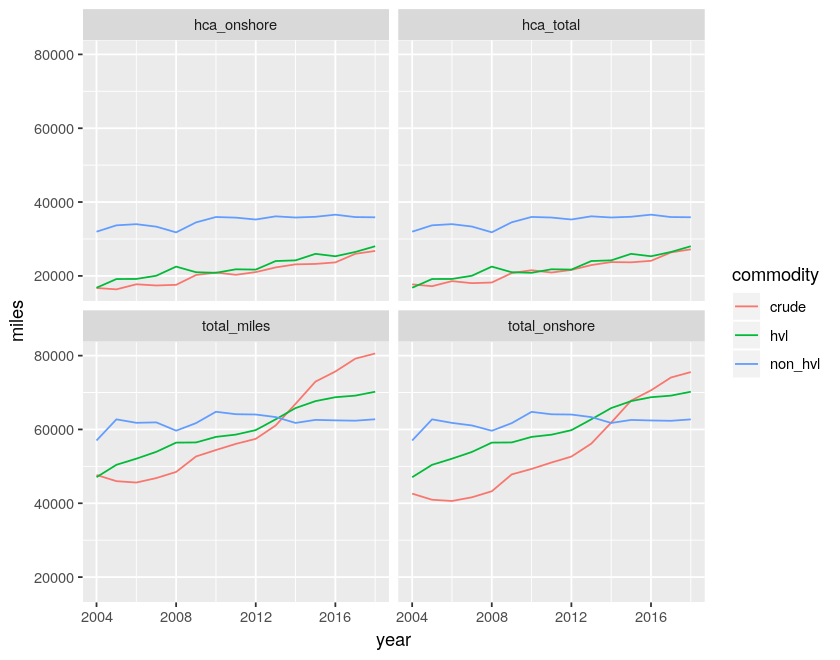

In [15]:
print(data_consistency)

## Grab largest companies

### Largest operators by total miles

In [16]:
largest_companies <- sample %>%
    group_by(Name) %>%
    filter(TOTAL_MILES == max(TOTAL_MILES)) %>%
    ungroup() %>%
    mutate(Name = fct_reorder(Name, TOTAL_MILES)) %>%
    arrange(desc(TOTAL_MILES)) %>%
    select(Name, TOTAL_MILES, OPERATOR_ID)

head(largest_companies) %>%
    jupyter_styling(font_size = 16)

Name,TOTAL_MILES,OPERATOR_ID
Enterprise Products Operating,13401.76,31618
ONEOK (Group),10784.50,ONEOK (Group)
Phillips 66 (Group),10356.00,Phillips 66 (Group)
Magellan (Group),9162.00,Magellan (Group)
Kinder Morgan (Group),7976.34,Kinder Morgan (Group)
NuStar (Group),7228.80,NuStar (Group)


In [17]:
largest_companies_plot <- largest_companies %>%
    top_n(35, TOTAL_MILES) %>%
    ggplot(aes(x = TOTAL_MILES, y = Name)) +
        geom_point()

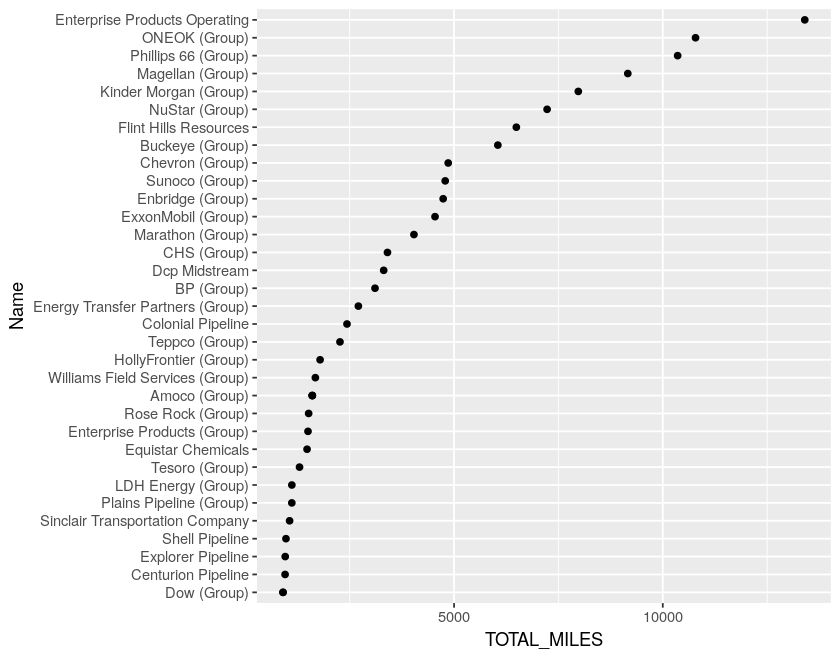

In [18]:
print(largest_companies_plot)

In [19]:
largest <- top_n(largest_companies, 6, TOTAL_MILES) %>%
    left_join(pipelines, by = c("OPERATOR_ID" = "ID")) %>%
    rename(ID = OPERATOR_ID) %>%
    select(-Name, name) %>%
    mutate(name = oildata::add_company_names(ID))
sample_n(largest, 5)

Warning message:
“Column `OPERATOR_ID`/`ID` joining factor and character vector, coercing into character vector”

TOTAL_MILES,ID,year,name,commodity,hca_offshore,hca_onshore,hca_total,total_onshore,total_offshore,total_miles,significant_incidents,serious_incidents
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10356.00,Phillips 66 (Group),2009,Phillips 66 (Group),hvl,0,954.275,954.275,3575.710,0,3575.710,2,0
7976.34,Kinder Morgan (Group),2007,Kinder Morgan (Group),crude,0,135.000,135.000,520.000,0,520.000,1,0
9162.00,Magellan (Group),2007,Magellan (Group),non_hvl,0,3505.000,3505.000,8737.000,0,8737.000,3,0
10356.00,Phillips 66 (Group),2006,Phillips 66 (Group),non_hvl,0,2493.000,2493.000,4648.738,0,4648.738,1,0
10356.00,Phillips 66 (Group),2013,Phillips 66 (Group),hvl,0,853.070,853.070,3180.970,0,3180.970,1,0


## Qualitative

## Industry-wide trends

* Good short-term outlook.
* Mid-term: threat of regulations.
* Money being pulled out of many businesses.
* No initiatives to diversify.
* The top 3 companies listed below are not in direct competition (different sub-industries).

### Enterprise Products Operating

* Fortune # 105 (2018).
* Family-owned, publicly traded company (Duncan family).
* Dan Duncan founded EPO in 1968 and was CEO until 2010.
* Current CEO: Randas Duncan WIlliams.
* Wikipedia highlights several explosions 2011-2017.
* Natural gas midstream company (HVL)
* In addition to pipelines, owns storage facilities, 24 natural gas processing platns, six offshore hub platforms, etc.
* States primaru focus on shale gas in company statement.

----

Midstream company: selling to other companies

<img src="https://www.enterpriseproducts.com/images/about_us_system_map/completeMap.png">

### ONEOK

* Natural gas utility.
* Forbes #630 (2019).
* Aqcuired NGL systems from Koch Industries in 2005.
* Spun out distribution business (consumer business unit) in 2014) - still under ONEOK ownership (?).


----

Utility company*: selling to consumers

\* Also owns some midstream assets

<img src="ONEOK_network_2019-12-09.png">

In [20]:
subset(m_as, group_name == "ONEOK (Group)") %>%
    mutate(name = oildata::add_company_names(members, pipelines_2004))

group_name,members,start_year,end_year,type,name
<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>
ONEOK (Group),32109,NA,NA,group,Oneok Ngl Pipeline
ONEOK (Group),30629,NA,NA,group,Oneok Field Services


In [21]:
ONEOK_construction <- pipelines %>%
    filter(ID == "ONEOK (Group)") %>%
    ggplot(aes(x=year, y=total_miles, color=commodity)) +
        geom_line()

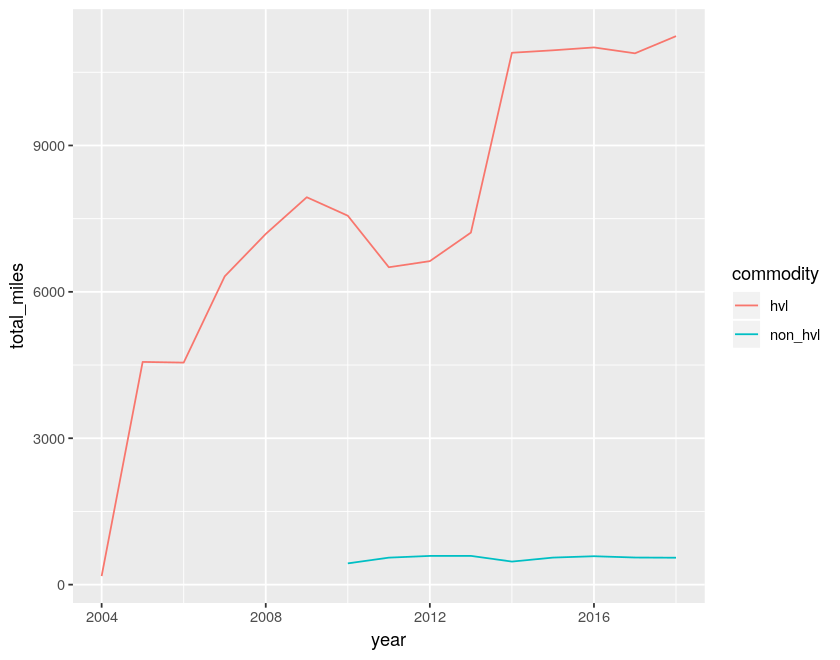

In [22]:
print(ONEOK_construction)

Acquisition probably does not show up because it was acquired as a whole.

In [23]:
pipelines_2004 %>%
    filter(ID %in% c(32109, 30629)) %>%
    select(ID, year, name) %>%
    jupyter_styling(font_size = 16)

ID,year,name
32109,2008,Oneok Ngl Pipeline
32109,2006,Oneok Ngl Pipeline
32109,2009,Oneok Ngl Pipeline
32109,2005,Oneok Ngl Pipeline
30629,2004,Oneok Field Services
32109,2007,Oneok Ngl Pipeline


### Phillips 66

* Spun off by ConocoPhillip in 2012.
* Forbes #23 (2018).
* Phllips: America-based, internationally active company (e.g., extraction in North Sea).
* Phillips (predecessor) experienced high-profile incidents in 1980, 1989, and 1999.
* Apart from midstream activities, also engages in chemicals, refining, and marketing (gas stations).
----
Downstream and midstream, diversified

<img src="phillips_66_network_2019-12-09.png">

## Information from the dataset

### Product mix - pipelines types

In [24]:
product_mix <- largest %>%
    pivot_wider(names_from = commodity, values_from = total_miles, id_cols = c(year, ID)) %>%
    select(year, ID, non_hvl, crude, hvl) %>%
    group_by(year, ID) %>%
    summarize(non_hvl = sum(non_hvl, na.rm = T), 
              crude = sum(crude, na.rm = T), 
              hvl = sum(hvl, na.rm = T)) %>%
    ungroup() %>%
    mutate(total = non_hvl + crude + hvl) %>%
    mutate(perc_non_hvl = non_hvl / total, 
           perc_crude = crude / total, 
           perc_hvl = hvl / total) %>%
    mutate(name = oildata::add_company_names(ID))
sample_n(product_mix, 5)

year,ID,non_hvl,crude,hvl,total,perc_non_hvl,perc_crude,perc_hvl,name
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2009,ONEOK (Group),0.000,0.000,7939.00,7939.00,0.00000000,0.0000000,1.00000000,ONEOK (Group)
2006,31618,442.198,797.265,12700.95,13940.42,0.03172057,0.0571909,0.91108853,Enterprise Products Operating
2018,Phillips 66 (Group),4314.290,2782.360,4415.51,11512.16,0.37475938,0.2416888,0.38355183,Phillips 66 (Group)
2017,Phillips 66 (Group),4320.840,2793.930,4419.60,11534.37,0.37460564,0.2422265,0.38316787,Phillips 66 (Group)
2014,Kinder Morgan (Group),6776.590,2041.370,704.56,9522.52,0.71163831,0.2143729,0.07398882,Kinder Morgan (Group)


In [25]:
product_mix_plot <- product_mix %>%
    pivot_longer(starts_with("perc"), names_to = "commodity") %>%
    ggplot(aes(x = year, y = value, color = commodity)) +
        facet_wrap(~name) +
        geom_line()

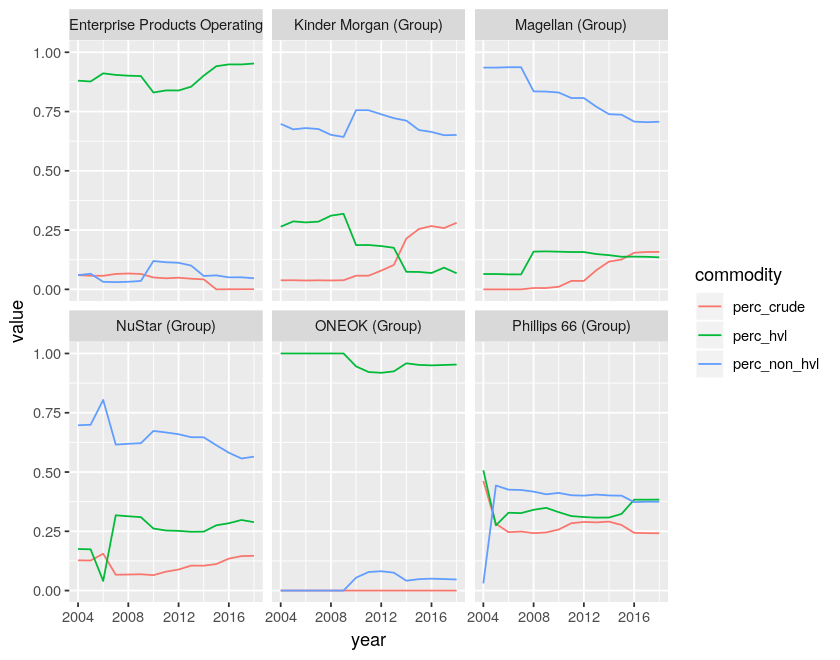

In [26]:
print(product_mix_plot)

In [27]:
construction <- largest %>%
    filter(commodity %in% c("crude", "hvl", "non_hvl")) %>%
    ggplot(aes(x=year, y=total_miles, color=commodity)) +
        facet_wrap(~name) +
        geom_line()

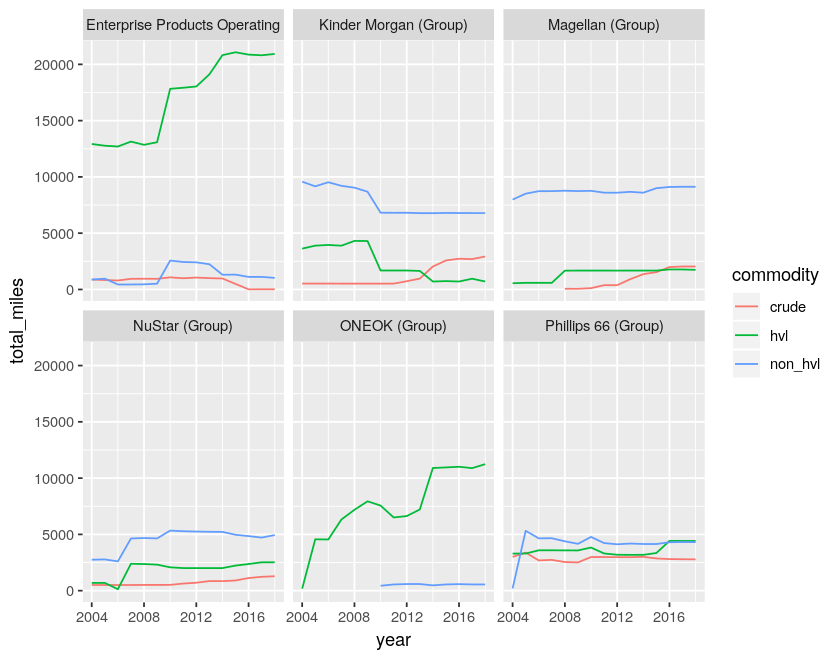

In [28]:
print(construction)

### Incident trends

In [29]:
incident_counts <- pipelines %>%
    mutate(name = oildata::add_company_names(ID)) %>%
    filter(name %in% largest$name) %>%
    ggplot(aes(x=year, y=significant_incidents)) + 
        facet_wrap(~ name) +
        geom_col()

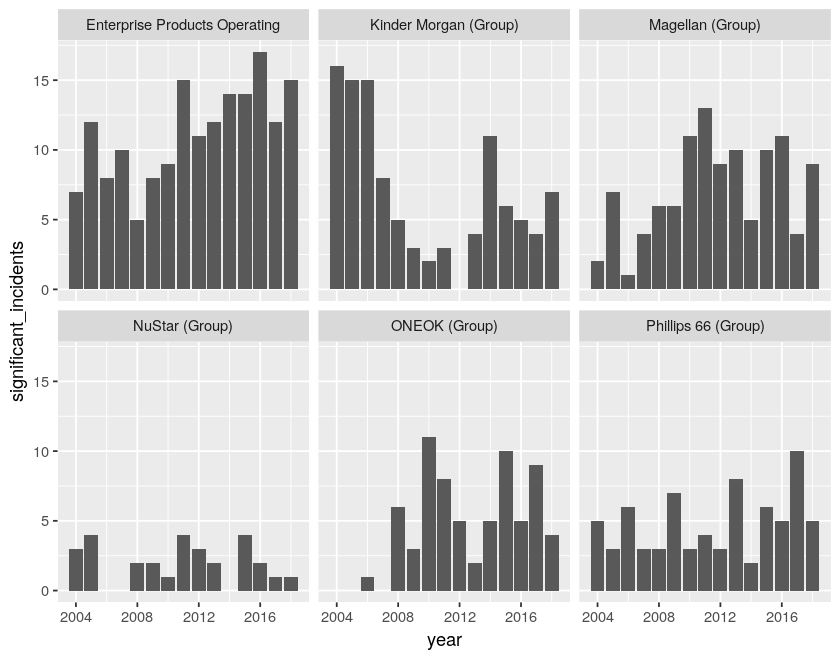

In [30]:
print(incident_counts)

### Relationships

In [31]:
largest_4 <- top_n(largest_companies, 4, TOTAL_MILES)
largest_4

Name,TOTAL_MILES,OPERATOR_ID
<fct>,<dbl>,<fct>
Enterprise Products Operating,13401.76,31618
ONEOK (Group),10784.50,ONEOK (Group)
Phillips 66 (Group),10356.00,Phillips 66 (Group)
Magellan (Group),9162.00,Magellan (Group)


In [32]:
miles <- pipelines %>%
    filter(ID == 31618) %>%
    mutate(ID = "Enterprise Products Operating") %>%
    ggplot(aes(x=year, y=total_miles)) +
        facet_wrap(~ commodity) +
        geom_line() +
        geom_smooth(method = "lm", se = FALSE) +
        labs(title = "Enterprise Products Operating") +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.title = element_text(size=10),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

incidents <- pipelines %>%
    filter(ID == 31618) %>%
    mutate(ID = "Enterprise Products Operating") %>%
    ggplot(aes(x=year, y=significant_incidents)) +
        facet_wrap(~ commodity) +
        geom_col() +
        geom_smooth(method = "lm", se = FALSE) +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

miles_smooth <- pipelines %>%
    filter(ID == 31618) %>%
    mutate(ID = "Enterprise Products Operating") %>%
    ggplot(aes(x=year, y=total_miles)) +
        facet_wrap(~ commodity) +
        geom_line() +
        geom_smooth(method = "loess", se = FALSE) +
        labs(title = "Enterprise Products Operating") +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.title = element_text(size=10),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

incidents_smooth <- pipelines %>%
    filter(ID == 31618) %>%
    mutate(ID = "Enterprise Products Operating") %>%
    ggplot(aes(x=year, y=significant_incidents)) +
        facet_wrap(~ commodity) +
        geom_col() +
        geom_smooth(method = "loess", se = FALSE) +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

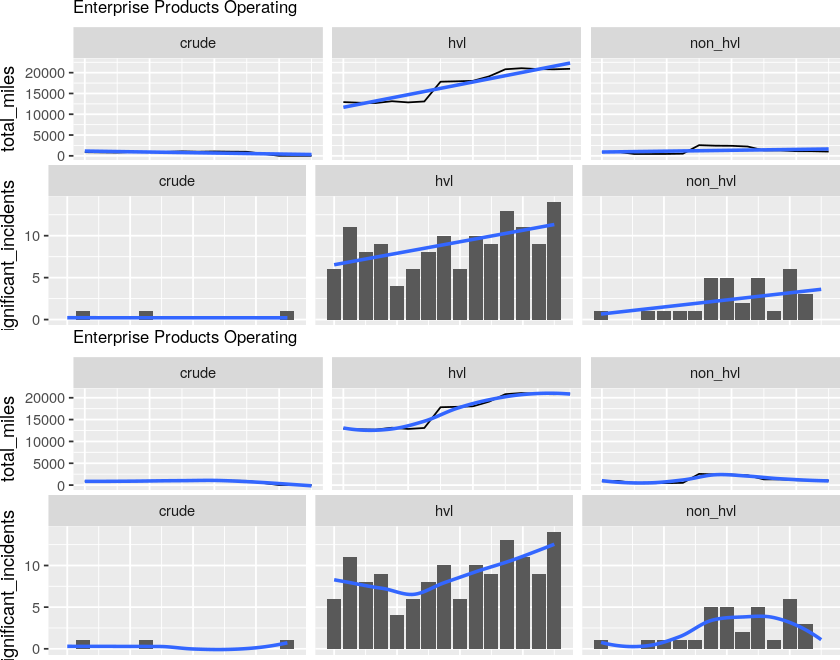

In [33]:
grid.arrange(miles, incidents, miles_smooth, incidents_smooth, ncol = 1)

In [34]:
miles <- pipelines %>%
    filter(ID == "ONEOK (Group)") %>%
    ggplot(aes(x=year, y=total_miles)) +
        facet_wrap(~ commodity) +
        geom_line() +
        geom_smooth(method = "lm", se = FALSE) +
        labs(title = "ONEOK (Group)") +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.title = element_text(size=10),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

incidents <- pipelines %>%
    filter(ID == "ONEOK (Group)") %>%
    ggplot(aes(x=year, y=significant_incidents)) +
        facet_wrap(~ commodity) +
        geom_col() +
        geom_smooth(method = "lm", se = FALSE) +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

miles_smooth <- pipelines %>%
    filter(ID == "ONEOK (Group)") %>%
    ggplot(aes(x=year, y=total_miles)) +
        facet_wrap(~ commodity) +
        geom_line() +
        geom_smooth(method = "loess", se = FALSE) +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.title = element_text(size=10),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

incidents_smooth <- pipelines %>%
    filter(ID == "ONEOK (Group)") %>%
    ggplot(aes(x=year, y=significant_incidents)) +
        facet_wrap(~ commodity) +
        geom_col() +
        geom_smooth(method = "loess", se = FALSE) +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

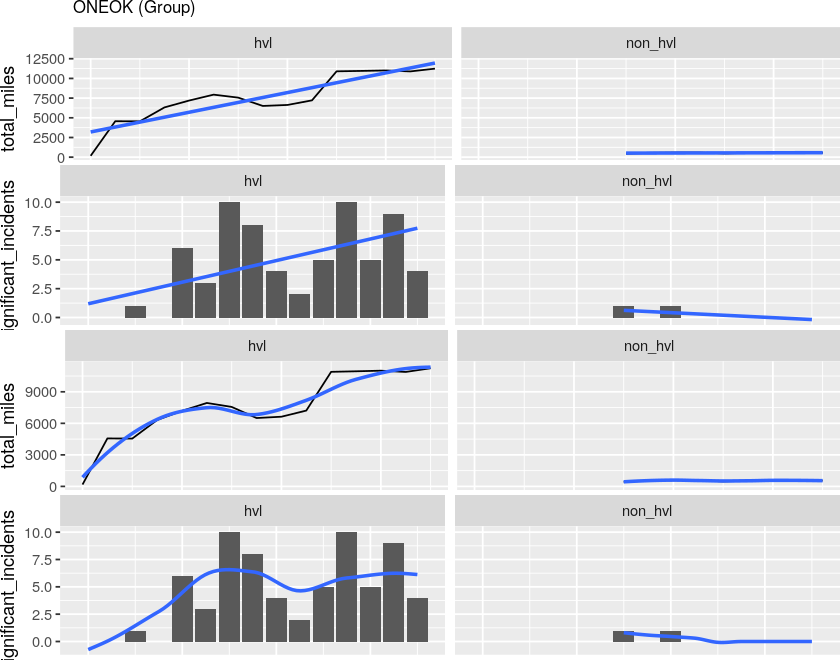

In [35]:
grid.arrange(miles, incidents, miles_smooth, incidents_smooth, ncol = 1)

In [36]:
miles <- pipelines %>%
    filter(ID == "Phillips 66 (Group)") %>%
    ggplot(aes(x=year, y=total_miles)) +
        facet_wrap(~ commodity) +
        geom_line() +
        geom_smooth(method = "lm", se = FALSE) +
        labs(title = "Phillips 66 (Group)") +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.title = element_text(size=10),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

incidents <- pipelines %>%
    filter(ID == "Phillips 66 (Group)") %>%
    ggplot(aes(x=year, y=significant_incidents)) +
        facet_wrap(~ commodity) +
        geom_col() +
        geom_smooth(method = "lm", se = FALSE) +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

miles_smooth <- pipelines %>%
    filter(ID == "Phillips 66 (Group)") %>%
    ggplot(aes(x=year, y=total_miles)) +
        facet_wrap(~ commodity) +
        geom_line() +
        geom_smooth(method = "loess", se = FALSE) +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.title = element_text(size=10),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

incidents_smooth <- pipelines %>%
    filter(ID == "Phillips 66 (Group)") %>%
    ggplot(aes(x=year, y=significant_incidents)) +
        facet_wrap(~ commodity) +
        geom_col() +
        geom_smooth(method = "loess", se = FALSE) +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

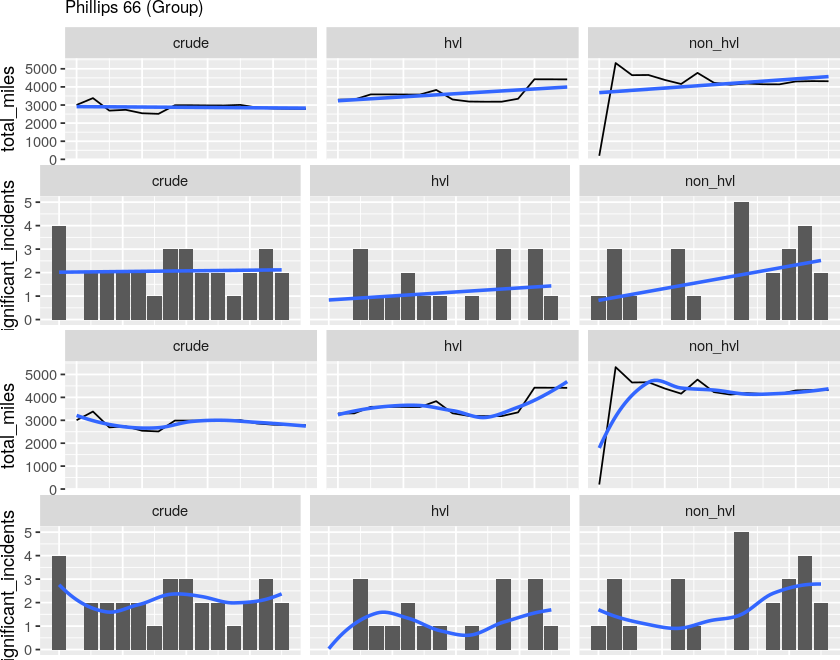

In [37]:
grid.arrange(miles, incidents, miles_smooth, incidents_smooth, ncol = 1)

### Incidents per mile

In [38]:
incidents_per_mile <- oildata::pipelines %>%
    mutate(name = oildata::add_company_names(ID)) %>%
    filter(name %in% largest$name) %>%
    group_by(year, name) %>%
    summarize(incidents_per_mile = sum(significant_incidents, na.rm = T) / sum(total_miles, na.rm = T), 
              total_miles = sum(total_miles, na.rm = T))

In [39]:
incidents_per_mile_graphed <- incidents_per_mile %>%
    ggplot(aes(x=year, y=incidents_per_mile)) + 
        facet_wrap(~ name) +
        geom_col()

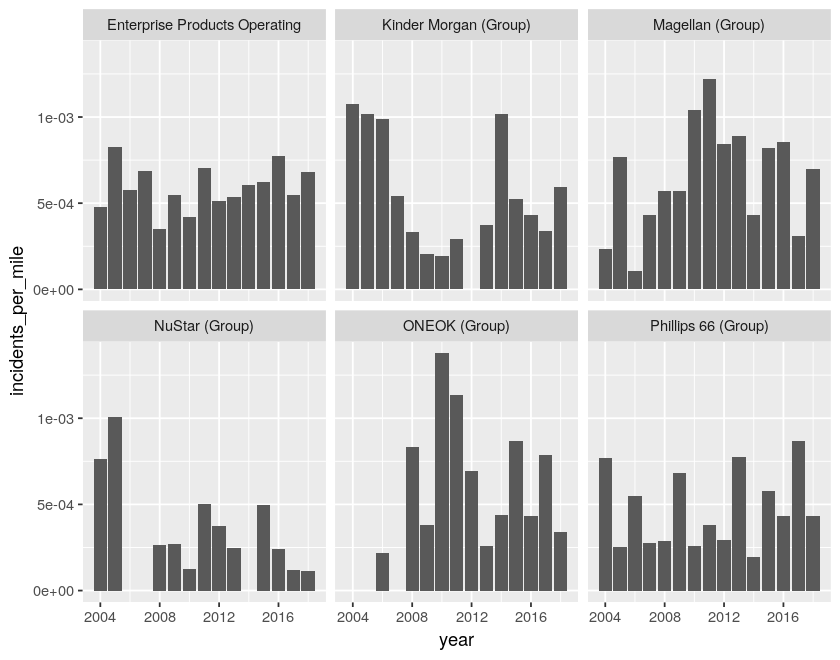

In [40]:
print(incidents_per_mile_graphed)

In [41]:
incidents_per_mile2 <- oildata::pipelines %>%
    mutate(name = oildata::add_company_names(ID)) %>%
    filter(name %in% largest$name) %>%
    group_by(year, name, commodity) %>%
    summarize(incidents_per_mile = sum(significant_incidents, na.rm = T) / sum(total_miles, na.rm = T), 
              total_miles = sum(total_miles, na.rm = T))

In [42]:
miles <- incidents_per_mile2 %>%
    filter(name == "Enterprise Products Operating") %>%
    ggplot(aes(x=year, y=total_miles)) +
        facet_wrap(~ commodity) +
        geom_line() +
        geom_smooth(method = "lm", se = FALSE) +
        labs(title = "Enterprise Products Operating") +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.title = element_text(size=10),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

incidents <- incidents_per_mile2 %>%
    filter(name == "Enterprise Products Operating") %>%
    ggplot(aes(x=year, y=incidents_per_mile)) +
        facet_wrap(~ commodity, scale = "free") +
        geom_line() +
        geom_smooth(method = "lm", se = FALSE) +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

miles_smooth <- incidents_per_mile2 %>%
    filter(name == "Enterprise Products Operating") %>%
    ggplot(aes(x=year, y=total_miles)) +
        facet_wrap(~ commodity) +
        geom_line() +
        geom_smooth(method = "loess", se = FALSE) +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.title = element_text(size=10),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

incidents_smooth <- incidents_per_mile2 %>%
    filter(name == "Enterprise Products Operating") %>%
    ggplot(aes(x=year, y=incidents_per_mile)) +
        facet_wrap(~ commodity, scale = "free") +
        geom_line() +
        geom_smooth(method = "loess", se = FALSE) +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

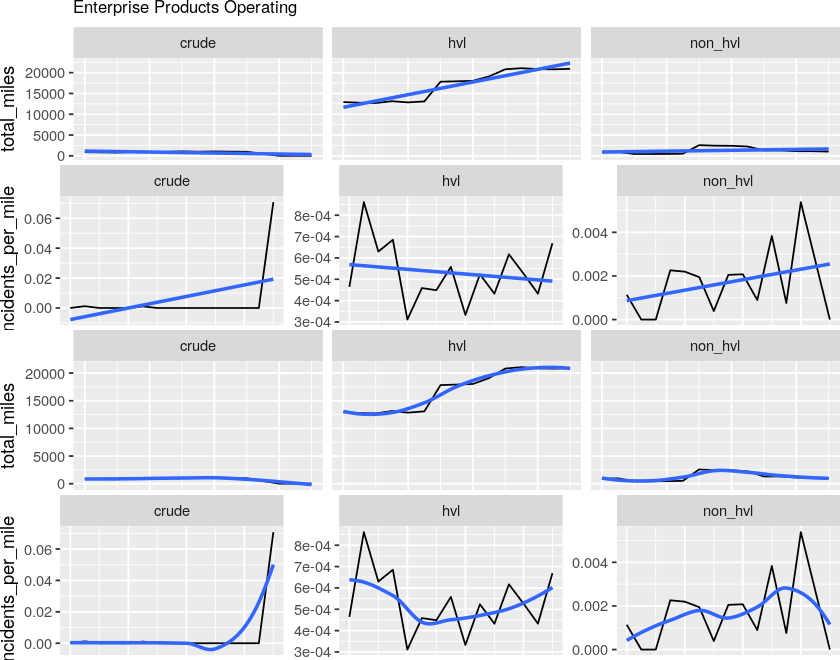

In [43]:
grid.arrange(miles, incidents, miles_smooth, incidents_smooth, ncol = 1)

In [44]:
miles <- incidents_per_mile2 %>%
    filter(name == "ONEOK (Group)") %>%
    ggplot(aes(x=year, y=total_miles)) +
        facet_wrap(~ commodity) +
        geom_line() +
        geom_smooth(method = "lm", se = FALSE) +
        labs(title = "ONEOK (Group)") +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.title = element_text(size=10),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

incidents <- incidents_per_mile2 %>%
    filter(name == "ONEOK (Group)") %>%
    ggplot(aes(x=year, y=incidents_per_mile)) +
        facet_wrap(~ commodity, scale = "free") +
        geom_line() +
        geom_smooth(method = "lm", se = FALSE) +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

miles_smooth <- incidents_per_mile2 %>%
    filter(name == "ONEOK (Group)") %>%
    ggplot(aes(x=year, y=total_miles)) +
        facet_wrap(~ commodity) +
        geom_line() +
        geom_smooth(method = "loess", se = FALSE) +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.title = element_text(size=10),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

incidents_smooth <- incidents_per_mile2 %>%
    filter(name == "ONEOK (Group)") %>%
    ggplot(aes(x=year, y=incidents_per_mile)) +
        facet_wrap(~ commodity, scale = "free") +
        geom_line() +
        geom_smooth(method = "loess", se = FALSE) +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

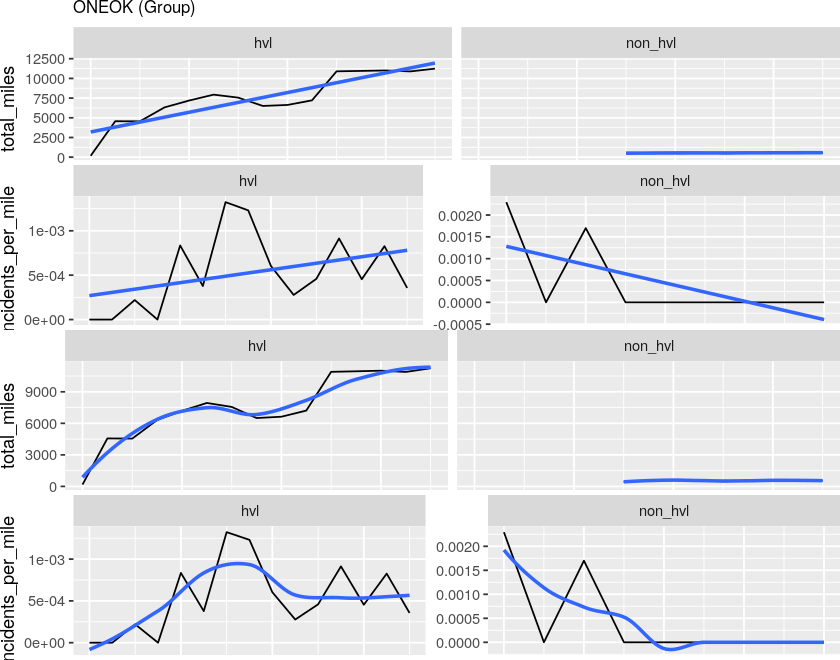

In [45]:
grid.arrange(miles, incidents, miles_smooth, incidents_smooth, ncol = 1)

In [46]:
miles <- incidents_per_mile2 %>%
    filter(name == "Phillips 66 (Group)") %>%
    ggplot(aes(x=year, y=total_miles)) +
        facet_wrap(~ commodity) +
        geom_line() +
        geom_smooth(method = "lm", se = FALSE) +
        labs(title = "Phillips 66 (Group)") +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.title = element_text(size=10),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

incidents <- incidents_per_mile2 %>%
    filter(name == "Phillips 66 (Group)") %>%
    ggplot(aes(x=year, y=incidents_per_mile)) +
        facet_wrap(~ commodity, scale = "free") +
        geom_line() +
        geom_smooth(method = "lm", se = FALSE) +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

miles_smooth <- incidents_per_mile2 %>%
    filter(name == "Phillips 66 (Group)") %>%
    ggplot(aes(x=year, y=total_miles)) +
        facet_wrap(~ commodity) +
        geom_line() +
        geom_smooth(method = "loess", se = FALSE) +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.title = element_text(size=10),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

incidents_smooth <- incidents_per_mile2 %>%
    filter(name == "Phillips 66 (Group)") %>%
    ggplot(aes(x=year, y=incidents_per_mile)) +
        facet_wrap(~ commodity, scale = "free") +
        geom_line() +
        geom_smooth(method = "loess", se = FALSE) +
        theme(axis.title.x = element_blank(),
              axis.text.x=element_blank(), 
              axis.ticks.x = element_blank(),
              plot.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"))

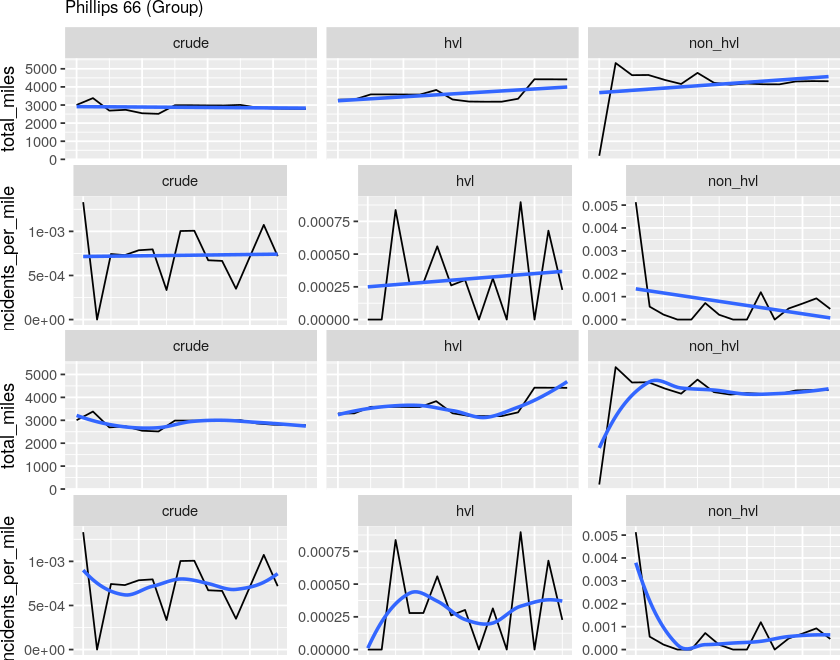

In [47]:
grid.arrange(miles, incidents, miles_smooth, incidents_smooth, ncol = 1)

## Other variables

### Pipeline age

In [48]:
sample_n(sample, 5)

YEAR,OPERATOR_ID,CRUDE_AGE_UNKNOWN_MILES,CRUDE_AVG_AGE,CRUDE_INCIDENTS,CRUDE_MILES,CRUDE_MILES_1940,CRUDE_MILES_1950,CRUDE_MILES_1960,CRUDE_MILES_1970,⋯,HVL_MILES_2010_3,NON_HVL_MILES_1940_3,NON_HVL_MILES_1950_3,NON_HVL_MILES_1960_3,NON_HVL_MILES_1970_3,NON_HVL_MILES_1980_3,NON_HVL_MILES_1990_3,NON_HVL_MILES_2000_3,NON_HVL_MILES_2010_3,Name
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2015,473,0,18.55273,0,31.000,0,0.000,43,4.000,⋯,44.4,0.00,0.00,0.000,0.00,0.0,0.00,0.000,0,Anadarko Petroleum
2004,22430,0,48.87781,0,4.000,0,4.000,0,0.000,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,West Shore Pipeline
2009,22855,0,25.25532,4,1097.000,12,209.000,0,264.000,⋯,0.0,5.00,46.00,29.000,3.00,2595.0,1071.00,5.000,0,Flint Hills Resources
2008,Phillips 66 (Group),0,49.28396,6,1110.213,565,895.991,594,34.934,⋯,0.0,181.00,4415.00,2264.544,1115.31,1621.4,1399.44,888.498,0,Phillips 66 (Group)
2010,31460,0,0.00000,0,0.000,0,0.000,0,0.000,⋯,0.0,17.64,18.09,0.000,0.00,20.7,0.00,0.000,0,Dod Defense Energy Support Center


### Other variables
* Inspections, actions taken
* Nominal pipe size, weld
* Minimum yield strength
* Corosion prevention status
* HCAs
* No location data for pipelines :( only for incidents

### Incidents

In [49]:
incidents <- oildata::incidents
sample_n(incidents, 5)

year,ID,commodity,significant,serious,cause
<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
2008,18092,non_hvl,TRUE,FALSE,corrosion
2017,15156,crude,TRUE,FALSE,operation
2002,1845,non_hvl,FALSE,FALSE,equipment
2006,15674,non_hvl,FALSE,FALSE,equipment
2013,31947,crude,TRUE,FALSE,equipment


In [50]:
cause_counts <- incidents %>%
    group_by(year, ID, commodity) %>%
    count(cause) %>%
    ungroup() %>%
    group_by(year, ID, cause) %>%
    summarize(n = sum(n, na.rm = T)) %>%
    ungroup()
sample_n(cause_counts, 5)

year,ID,cause,n
<dbl>,<dbl>,<chr>,<int>
2019,1248,operation,1
2008,32147,equipment,1
2009,300,operation,1
2017,31570,operation,1
2019,9175,equipment,1


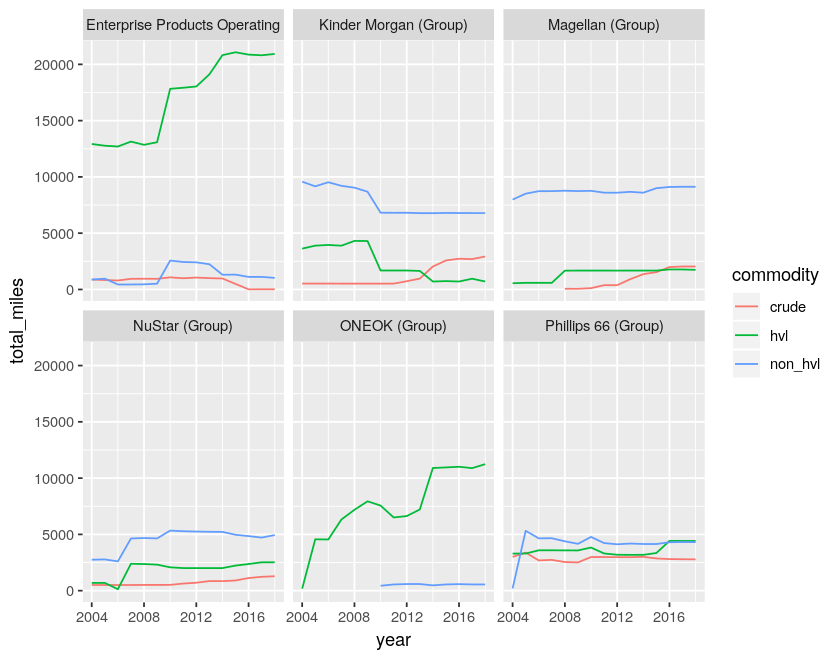

In [51]:
print(construction)

In [52]:
epo_causes <- cause_counts %>%
    filter(ID == 31618) %>%
    ggplot(aes(x = year, y = n)) +
        facet_wrap( ~ cause) + 
        geom_col()

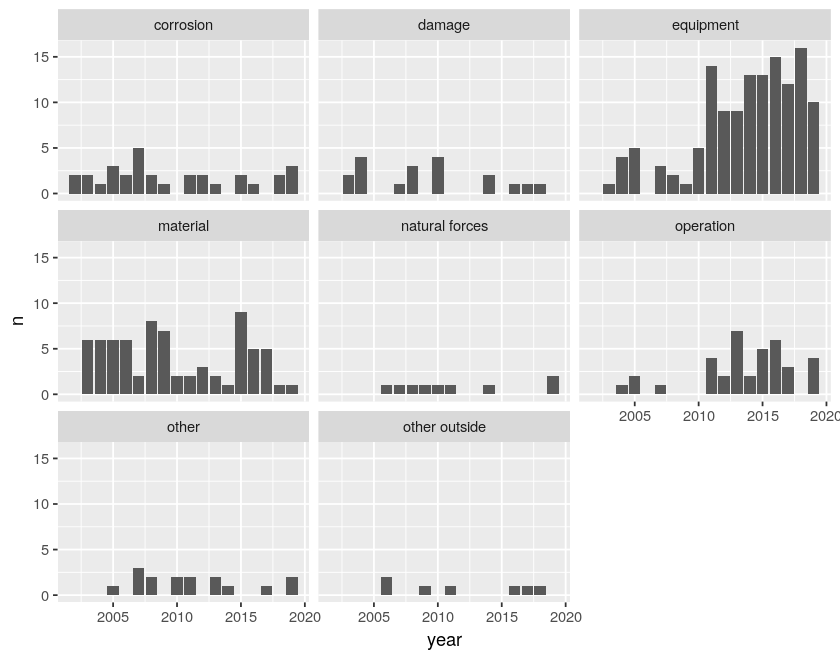

In [53]:
print(epo_causes)

In [54]:
set.seed(56)

In [55]:
sample_n(subset(incidents_2010, cause == "equipment" & ID == 31618, c(year, narrative)), 1)

year,narrative
<dbl>,<chr>
2013,"A technician was contacted by pipeline control at 8:31 pm that the #1 unit was indicating a seal failure. The pump was not running at the time. Upon arrival, the technician discovered the #1 unit pump seals had failed thus allowing diesel to fill the drain tank and backup to pump causing a spill of approximately 50 gallons. The technician stopped the leak by manually closing the suction and discharge valves. The seal was replaced and spilled diesel was vacuumed out of the drain tank. Contaminated soil was excavated and replaced."


In [56]:
sample_n(subset(incidents_2010, cause == "equipment" & ID == 31618, c(year, narrative)), 1)

year,narrative
<dbl>,<chr>
2013,"A contract painting crew was removing masking at the enterprise te products cape girardeau terminal near the p2 -20"" pipeline meter skid. One of the paint crew employees smelled gasoline and immediatly summoned a enterprise operations technician. The enterprise operations technician saw product leaking from a tubing fitting on the densitometer. The enterprise operations technician immediately called the control room and the pipeline was shutdown. The tubing connection was repaired and the pipeline was restarted 20 minutes later. Local operations began clean up. The released producted was contained / suspended within an adjacent excavation which contained about 18"" of rainwater. The contaminated rainwater / adjacent soil was remediated. All tubing connections on the densitometer were checked for proper torque and vibration."


In [57]:
sample_n(subset(incidents_2010, cause == "equipment" & ID == 31618, c(year, narrative)), 1)

year,narrative
<dbl>,<chr>
2019,"On 8/9/2019, an enterprise employee was making rounds and noticed a leak of propane from the p2 mainline pump. The pump was immediately shutdown and leak was isolated. The seal of the pump was identified as what was causing the leak from normal wear and tear. 1.07 barrels were unintentionally released and 4.93 barrels were released by flare in order to shutdown the pump to repair the seal. The pump seal was repaired and the pipeline was put back into service."


In [58]:
sample_n(subset(incidents_2010, cause == "operation" & ID == 31618, c(year, narrative)), 1)

year,narrative
<dbl>,<chr>
2016,"The usace is making additions to the mississippi river levee in the area of the yscloskey pipeline and requested the removal of approximately 400 feet of the pipeline in the levee. On february 15, 2016, work began with installing stopples into mainline and confirming 0 lel was present before any cutting was initiated. The idle section of pipeline was cut from the mainline and air gapped on each end with a minimum of 3 feet distance to mainline piping. On february 18th at 1:26 pm, the idle section of pipeline was verified to have 0 lel and was kept open ended. At 7:35 pm contractors finished welding the root pass of a 10 inch flange on the mainline piping and began to use a grinder to prepare for the next weld pass. Sparks from the grinder entered the adjacent idle piping approximately 4 feet away. The welder saw an instantaneous flash and glow moving away from him inside the idled segment of piping. The flash was contained inside of the idle pipeline to be removed. The cause of the flash fire was failure to recognize the hazard of potential trapped gas in the low spot of the levee pipeline or the idle and open valve body near the levee. Further review of the job plan and recognition of these hazards is complete. Retraining of the area pipeline technicians per our safety policy manual will be implemented in safe work permit hot work requirements and hazards assessment."


In [64]:
locations <- subset(incidents_2010, cause == "operation" & ID == 31618, c(year, LOCATION_LATITUDE, LOCATION_LONGITUDE))
locations

year,LOCATION_LATITUDE,LOCATION_LONGITUDE
<dbl>,<dbl>,<dbl>
2011,29.76750,-95.01218
2011,29.91150,-94.09319
2011,39.48263,-84.22304
2011,38.38052,-97.83095
2012,41.73889,-90.81979
2013,37.05255,-95.61209
2013,36.94722,-100.29315
2013,37.05239,-95.61158
2013,39.02942,-97.38027


### Save slides*

* Run after saving!

In [89]:
system("jupyter nbconvert explore_data_variance.ipynb --to slides")